In [ ]:
print("DATAVERSE MODEL TRAINING")

In [1]:
import pandas as pd

df1 = pd.read_excel("Data/Country-Code.xlsx")
df2 = pd.read_csv("Data/Foodora Data.csv", encoding="latin1")

print(df1.head())
print(df2.head())

print(df1.shape)
print(df2.shape)


   Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Localit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("Data/Foodora Data.csv", encoding="latin1")


cleaning (important for clean visuals)

In [9]:
df = df[df["Aggregate rating"] > 0]
df = df[df["Votes"] > 0]


City vs Average Rating (Bar Chart)

📌 Columns used
-> City
-> Aggregate rating

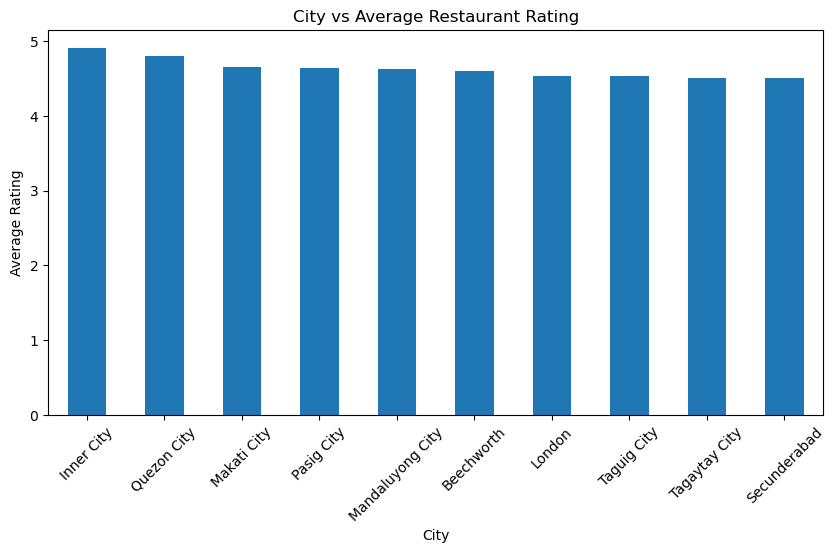

In [10]:
city_rating = (
    df.groupby("City")["Aggregate rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
city_rating.plot(kind="bar")
plt.title("City vs Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


Votes vs Ratings (Scatter Plot – Popularity Trap)

📌 Columns used
-> Aggregate rating
-> Votes

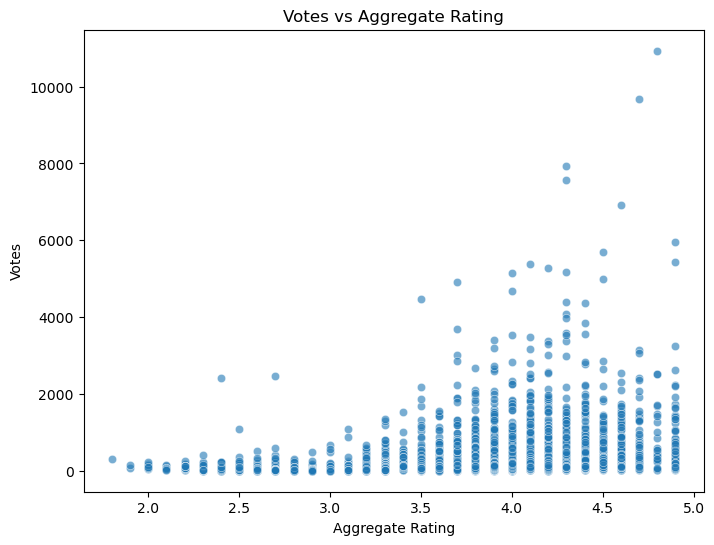

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Aggregate rating",
    y="Votes",
    alpha=0.6
)

plt.title("Votes vs Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.show()


Cuisine Popularity vs Satisfaction (Bubble Chart)

📌 Columns used
-> Cuisines
-> Aggregate rating
-> Restaurant ID

In [12]:
cuisine_df = df.copy()
cuisine_df["Cuisines"] = cuisine_df["Cuisines"].str.split(", ")
cuisine_df = cuisine_df.explode("Cuisines")


In [13]:
cuisine_stats = cuisine_df.groupby("Cuisines").agg(
    avg_rating=("Aggregate rating", "mean"),
    restaurant_count=("Restaurant ID", "count")
).reset_index()


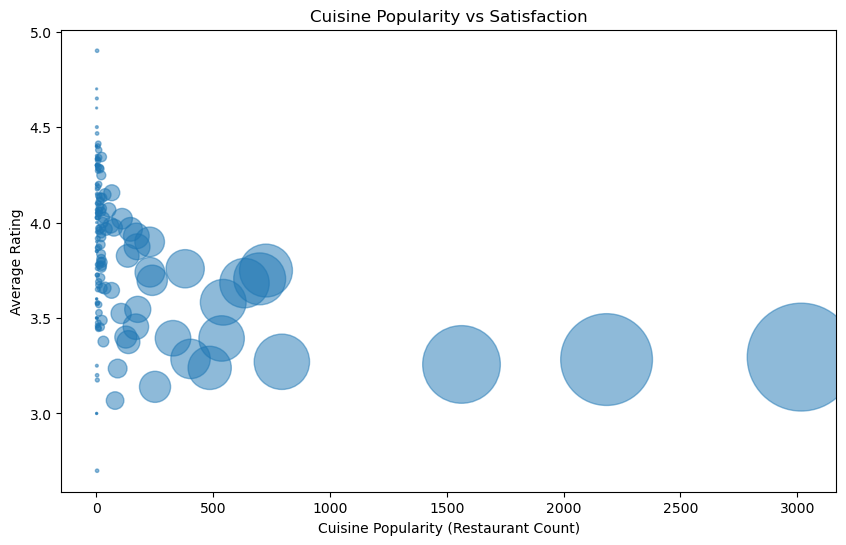

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(
    cuisine_stats["restaurant_count"],
    cuisine_stats["avg_rating"],
    s=cuisine_stats["restaurant_count"]*2,
    alpha=0.5
)

plt.xlabel("Cuisine Popularity (Restaurant Count)")
plt.ylabel("Average Rating")
plt.title("Cuisine Popularity vs Satisfaction")
plt.show()


Price Range vs Ratings (Box Plot)

📌 Columns used
-> Price range
-> Aggregate rating

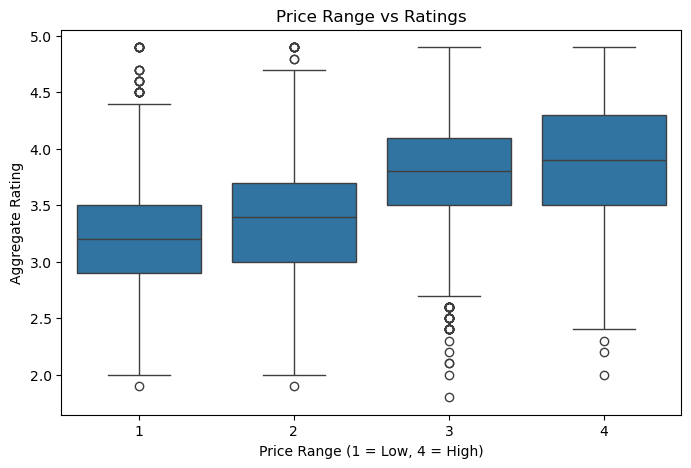

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Price range",
    y="Aggregate rating"
)

plt.title("Price Range vs Ratings")
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.ylabel("Aggregate Rating")
plt.show()


Delivery Adoption by City (Stacked Bar Chart)

📌 Columns used
-> City
-> Has Online delivery

In [16]:
delivery_city = pd.crosstab(
    df["City"],
    df["Has Online delivery"]
)

delivery_city = delivery_city.head(10)


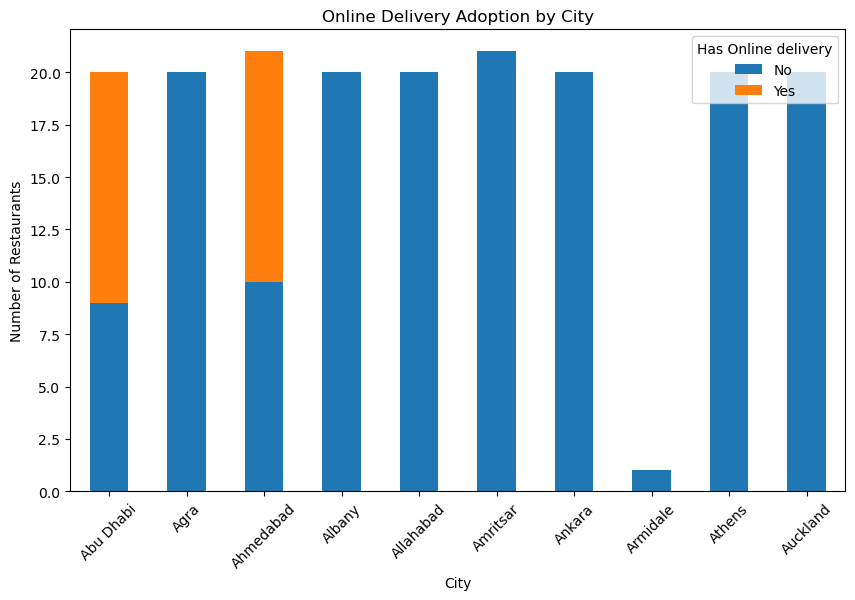

In [17]:
delivery_city.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Online Delivery Adoption by City")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()
